# Predicting Hardness Values of Materials

## Predicting Mohs Hardness Values of Naturally Occuring Minerals 



This project was completed as a part of my manuscript that is published in *2019 ACS Symposium Series: Machine Learning in Chemistry* "Prediction of Mohs hardness with machine learning methods using compositional features". The link to that manuscript can be found [here](https://pubs.acs.org/doi/abs/10.1021/bk-2019-1326.ch002). 

In that manuscript, I predicted Mohs hardness values of naturally occuring minerals and artificially grown materials with 9 machine / statistical learning models. However in this portfolio project, I only highlight the procedure for the best performing model.

In this portfolio project, I evaluate the performance and predictive power of a model that has been trained and tested on atomic and electronic features calcuated based on chemical composition of naturally occuring minerals. A well-fitting model trained on this data could then be used to make certain predictions about not-yet grown materials for various industries:
- Drilling$^{1,2}$, 
- Boring$^{3,4}$, 
- Abrasives$^{5-7}$, 
- Medical/dental implants$^{8-10}$, and
- Protective coatings$^{11-13}$. 

## Background


### What is Mohs Hardness? 

Hardness, or the quantitative value of resistance to permanent or plastic deformation, plays a crucial role in materials design for many applications, such as ceramic coatings and abrasives. Hardness testing is an especially useful method as it is non-destructive and simple to implement to gauge the plastic properties of a material. 

Increased manufacturing demand fuels the drive for new materials of varying hardnesses, which makes the fundamental understanding of the physical origin of this property necessary. Hardness testing is a non-destructive measurement of a material’s resistance to permanent or plastic deformation. One such hardness test is the Mohs scratch test, in which one material is scratched with another of a specified hardness number between 1 and 10. Materials that are easily scratched, such as talc, are given a low Mohs number (talc’s is 1) while materials that are highly resistant to plastic deformation and difficult to scratch, such as diamond, are given a high Mohs number (diamond’s is 10).

More information about the Mohs scale can be found here in this quick video by Garrett Barmore, the curator at the  W.M. Keck Earth Science and Mineral Engineering Museum! https://youtu.be/NF_bGfjZVRQ

### Factors that Affect Hardness Behavior
The Mohs hardness of a material is influenced by many factors that can be grouped into two major categories: chemical bonding and composition. 

#### Chemical Bonding
Material hardness for single-crystal brittle materials like minerals can depend on the type of chemical bonding, which can affect a material’s ability to start dislocations under stress$^{14-16}$. 

Materials low on the Mohs scale, such as talc (M = 1) and gypsum (M = 2), exhibit van der Waals bonding between molecular chains or sheets. 

Materials with ionic or electrostatic bonding have a larger Mohs hardness. 

Materials at the top of the Mohs scale, such as boron nitride (M = 9) and diamond (M = 10), have large covalent components. Covalent bonding restricts the start of dislocations under stress, producing a resistance to plastic deformation. 

#### Composition
Hardness is also related to the correlation of composition and bond strength$^{17-21}$. Light elements have extremely short and strong bonds, as do transition metals which have high number of valence bonds. Higher Mohs hardness is correlated to high average bond length, high number of bonds per unit volume, and a higher average number of valence electrons per atom.


### Why Should We Predict It? 
Identifying the key features of a material that are involved in hardness can broaden our understanding of the mechanism of plastic deformation, and therefore guide the design of novel materials. 

## Project Motivation and Setup

The thrust of this study was to combine all of these factors that have been theoretically connected to hardness and understand how they may interact with each other and contribute to the hardness of crystalline ceramic materials. Previously, these factors were been used to explain hardness across a small range of crystal structures, bonding frameworks, and hardness values. In this study, I looked to expand these concepts to a large number of compounds with various types of chemical bonding types, structures, and compositions. These chemophysical parameters may interact with each other to predict a range of hardness values.


The dataset for training and testing the classification models used in this study originated from experimental Mohs hardness data, their crystal classes, and chemical compositions of naturally occurring minerals reported in two compilations: 
- Physical and Optical Properties of Minerals found in the *CRC Handbook of Chemistry and Physics*$^{22}$ 
- *American Mineralogist Crystal Structure Database*$^{23}$. 
 
The database is composed of 369 uniquely named minerals. Due to the presence of multiple composition combinations for minerals referred to by the same name, the first step was to perform compositional permutations on these minerals. This produced a database of 622 minerals of unique compositions, comprising 210 monoclinic, 96 rhombohedral, 89 hexagonal, 80 tetragonal, 73 cubic, 50 orthorhombic, 22 triclinic, 1 trigonal, and 1 amorphous structure. The datasets for this project are stored on Mendeley Data at http://dx.doi.org/10.17632/jm79zfps6b.1 .

I've included a more informative .csv file that has the crystal classes of the minerals as well. I'll be using that for the rest of the portfolio project.

## Visualizing Data

We'll start with reading the data into pandas dataframes and viewing the distribution of hardness values in the training and testing datasets. 

In [18]:
#Import libraries necessary for the project

import pandas as pd
import matplotlib.pyplot as plt

#Checking out the datatypes of the features 
df=pd.read_csv("ElevenFeatures_Minerals_withCrystalSystem.csv",index_col=0)
df=df[pd.notnull(df["Hardness"])]

print("Naturally Occuring Minerals Dataset has {} data points with {} features.".format(*df.shape)) #, df.info())

Naturally Occuring Minerals Dataset has 622 data points with 14 features.


## Displaying Histogram of Naturally Occuring Mineral Dataset

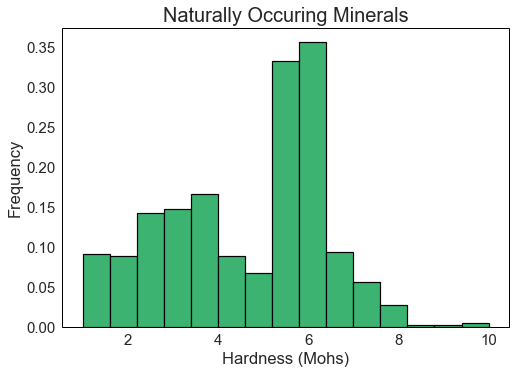

In [70]:
hist = df["Hardness"].hist(bins = 15, normed = True, linewidth=1.2, edgecolor='k', color='mediumseagreen')
plt.xlabel("Hardness (Mohs)")
plt.ylabel("Frequency")
plt.title("Naturally Occuring Minerals", fontsize = 20)
plt.grid(False)

#Aesthetics: Plot background color
hist.set_facecolor('white')
hist.patch.set_edgecolor('black')  
hist.patch.set_linewidth('1')  
hist.tick_params(axis='both', which='major', labelsize=15)

plt.show()

## Why Classification Instead of Regreesion?



## Case for Regression

Mohs values go from 1 (talc) to 10 (diamond). For machine learning / statistical learning problems, regression is typically used for target properties that have a continuous numerical value. 

## Why Classification May Actually Be Better

However, classification is actually a better choice for multiple reasons.

-	**Nature of Mohs scale**
    - Mohs is an ordinal scale instead of a continuous scale
    - Mohs scales exponentially as a function of other hardness values, not linear
    - Also, large variation of on the same material with different scratch direction. Example of 100 vs 111 $^{24}$
    - If this were based on a different hardness scale like Vickers, then sure. Mohs not so much. 
    
-	**Applications** 
    - Many applications are of interest in the medium (M 4 - 7) and hard (M 7 - 10) materials so as long as in that range, they’ll be ok. An exact number isn’t as necessary. Close is good. 

-	**Binning by bond length**
    - Classification is already informally used by researchers using energy-based calculations when exploring superhard (M > 9+) materials.
    - Šimůnek and Vackář$^{21}$: 
        - Bond length – hardness correlation based on binarized regimes of hardness values. For materials with bond lengths greater than 2.4 Å, the Vickers hardness values were calculated to be less than 6.8 GPa (Mohs value (0.991, 5.5]).  For materials with bond lengths less than 2.4 Å, the Vickers hardness values were calculated to be greater than 6.8 GPa (Mohs value (5.5, 10]).
    - Gao$^{20}$: 
        - Bond length distinction based on three regimes of hardness values. For materials with bond lengths greater than 2.5 Å, the Vickers hardness values were calculated to be under 5 GPa (Mohs value (0.991, 4]).  For materials with bond lengths between 2 and 2.5 Å, the Vickers hardness values were calculated to be between 5 GPa and 12 GPa (Mohs value (4, 7]).  For materials with bond lengths less than 2 Å, the Vickers hardness values were calculated to be between 12 GPa and 40 GPa (Mohs value (7, 10]).
    - Based on these groupings, the calculated Vickers hardness values from both studies were converted to approximate Mohs hardness values and used as bins in this study. Minerals were grouped according to their Mohs hardness values as shown in the table below.



Binary (2-class) Classification / Šimůnek and Vackář

|Class|Mohs Hardness|
|---------|-----------------------|
|0|	(0.991, 5.5]|
|1|	(5.5, 10.0]|


Ternary (3-class) Classification / Gao


|Class|Mohs Hardness|
|---------|-----------------------|
|0|	(0.991, 4.0]|
|1|	(4.0, 7.0]|
|2|	(7.0, 10.0]|


In the manuscript, I employed nine different statistical, or machine, learning models as shown in the table below. 

|ID|	Model|
|-------|------|
|1	|Binary RBF SVC|
|2	|Ternary RBF SVC - OVO|
|3	|Binary RF|
|4	|Ternary RF – multiclass|
|5	|Ternary RF – OVR: 0 versus 1, 2|
|6	|Ternary RF – OVR: 1 versus 0, 2|
|7	|Ternary RF – OVR: 2 versus 0, 1|
|8	|Binary Matérn SVC|
|9	|Ternary Matérn SVC - OVO|


## Why not smaller classes?
I’m already dealing with a sparse dataset. If the dataset were larger, then smaller classes would be more useful.

## Model for this Portfolio Project

In the manuscript, I perform all 9 models as well as grid optimization for the SVMs. In this portfolio project however, I narrow this down to highlight the procedure for the best performing model only, Model 5. Model 5 is a binary random forest in which Class 0 (0.991, 4.0] is classified against a combined superclass of Classes 1 (4.0, 7.0) and 2 (7.0, 10.0]. This model is employed to separate materials with low hardness values from the rest of the dataset. 

Essentially, this is a **binary classification problem (M < 4 vs M >= 4)**.


## Feature Observation
To dive a bit deeper into the data, let's review the 11 atomic and electronic features to be used in this project:

|ID	|Name	|Feature Description|
|----|------|-------------------|
|0	|allelectrons_Total|	Total number of electrons|
|1	|density_Total|	Total elemental density|
|2	|allelectrons_Average|	Atomic average number of electrons|
|3	|val_e_Average|	Atomic average number of valence electrons|
|4	|atomicweight_Average|	Atomic average atomic Weight|
|5	|ionenergy_Average|	Atomic average first ionization energy|
|6	|el_neg_chi_Average|	Atomic average Pauling electronegativity of the most common oxidation state	|
|7	|R_vdw_element_Average|	Atomic average van der Waals atomic radius|
|8	|R_cov_element_Average|	Atomic average covalent atomic radius|
|9	|zaratio_Average|	Atomic average atomic number to mass number ratio|
|10|	density_Average|	Atomic average elemental density|

### Why These Features?

The features for this study were chosen based on factors implemented in previous methods to predict material hardness. The related factors from these studies were included as features that are easily calculated from the number of atoms in the empirical formula and elemental characteristics. The number of valence electrons per bond was included as a factor in Gao et al$^{20}$, Šimůnek et al$^{21}$, and Mukhanov et al$^{25}$. In this study, the effect of valence electrons on hardness is considered by a simplified feature of atomic average of valence electrons. Atomic weight was included in this study since it is used to calculate molar volume, which was a factor in Mukhanov et al’s study34 as well. Atomic radii (covalent and van der Waals) were included as features in this study since they are related to the bond length factor in Gao et al$^{20}$ and the molar volume in Mukhanov et al$^{25}$. Electronegativity was included in the feature set as the atomic average of Pauling electronegativity for all elements in a material’s empirical formula. This atomic average is a simplified version of the electonegativity-derived factors of bond electronegativity, stiffness of atoms, and bond ionicity factors in Li et al$^{26, 27}$ used to predict hardness. 

In addition to feature based on characteristics previously utilized in hardness calculations, three more features are also included: the first ionization energy, the total number of all electrons, and the atomic number to mass ratio for each compound. Each of these have a connection to either the atomic radii or the strength of bonds of these materials. The first ionization energy, or the amount of energy to remove the most loosely bound valence electron is directly related to the nature of bonding in a material$^{28, 29}$. Since hardness has been previously connected to bond strength, it makes sense that this could also be a related factor to mechanical properties like hardness. 

The total number of electrons (both bonding and nonbonding) are also included in this study as a feature due to their contribution to atomic radii. As the number of electrons in inner shells increases, the repulsive force acting on the outermost shell electrons in a process known as shielding. This repulsive force increases the atomic radius, which could directly affect the bond length of a material. The atomic number to mass number ratio (Z/A) is directly related to the total electron cross-section, or the effective electronic energy-absorption cross section of an individual element. While it is commonly used to describe x-ray attenuation, it may also help in this case to describe an effective area of electronic activity that can contribute in a different context. 


### Feature Correlation


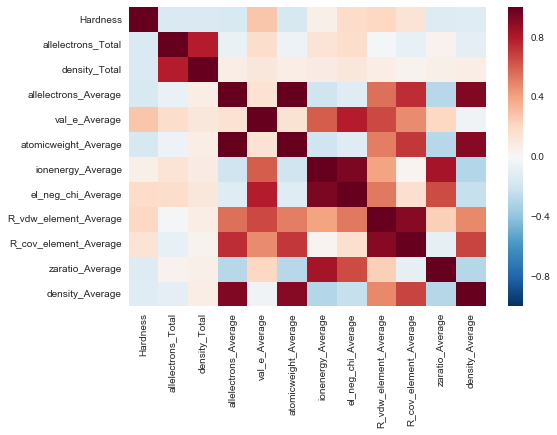

In [20]:
import seaborn as sns

correlation_df = df.iloc[:,2:]
corr = correlation_df.corr()
sns_plot=sns.heatmap(corr)
plt.show()

## Data Preprocessing

### Transforming data into classes
To transform the hardness data from floats to classes mentioned in the above table, I employed label encoding. It's not the only way to complete this but it works. 

In [21]:
#Importing mineral dataset
X = df.iloc[:,3:]
y_float = df.iloc[:,2]

# In order to binarize into low and medium/high hardness classification problem
# List comprehension applied to make 0 and 1 classes

y = [1 if each >= 4.0 else 0 for each in y_float]

print("About {0:.1%} of materials are in the positive class.".format(sum(y)/len(y)))

About 61.9% of materials are in the positive class.


### Scaling Features

Each feature was standardized by individually centering to the mean and scaling to unit variance or standard deviation. While random forests are less sensitive to absolute values, SVMs are sensitive to feature scaling. This is due to the construction of the hyperplane on the distance between nearest data points with different classification labels, or support vectors. If one of the dimensions have a drastically larger value range, it may influence this distance and thereby affect the hyperplane. For consistency, all models in the manuscript used this standardized feature space so let's go through it here.

Standardize features by removing the mean and scaling to unit variance with StandardScaler in scikit-learn.

In [22]:
from sklearn.preprocessing import StandardScaler

#Importing features from mineral dataset
X = df.iloc[:,3:]

# Centering feature space to the mean and scaling to unit variance or standard deviation
X_scale = StandardScaler().fit_transform(X)
X = X_scale


## Developing a Model

In the manuscript, I built and trained nine supervised learning models to classify hardness values in naturally occurring minerals and artificially grown materials. Specifically, I implemented random forest and support vector machines to predict Mohs hardness. 

In this portfolio project, I only demonstrate the random forest implementation, This section reviews the models, optimization schema, feature importance calculations, and evaluation criteria utilized in this study.

### Implementation: Define a Performance Metric
In this study, all nine machine learning models are trained to predict Mohs hardness through binary or ternary classification methods. Their performance is evaluated with four metrics based on the true positives (Tp), true negatives (Tn), false positives (Fp), and false negatives (Fn) predicted by a given classification model. The metrics used in this study are accuracy, specificity, precision, recall, and F1 scores.  

Accuracy (A) gives the proportion of true positive results in a population. Precision (P) describes how many of true positive predictions are actually positive. Specificity (S) is the probability that a classification model will identify true negative results. The higher the specificity, the lower the probability of false negative results. Recall (R) or sensitivity indicates the proportion of actual positives that were predicted as positive. R is the probability that a classification model will identify true positive results. The higher the recall, the lower the probability of false positive results. Typically, precision and recall are considered together through the F1-score (F1). F1 is the harmonic average of precision and recall and gives equal importance to both. It is an important metric for datasets with uneven class distribution. The closer F1 is to 1, the closer the model comes to perfect recall and precision. 

**Recap**

Performance metrics:
- Accuracy (A): # correct over total
- Precision (P): # true positive that are acutally positive
- Recall (R): probability of true positive results
- Specificity (S): probability of true negative results
- F1 score: great for uneven class distribution


## Analyzing Model Performance

### ROC/AUC

Next, the effectiveness of the RF binary classifier was evaluated using the quantitative variables of true positive rate, which represents the total number of correctly classified Mohs hardness values in the positive class, and the false positive rate, which represents the total number of incorrectly classified Mohs hardness values assigned to the positive class. With these variables, the receiver operating characteristic (ROC) curves were calculated. ROC  curves plot the true positive rate for a binary classifier as a function of its false positive rate to gauge model performance. The area under the curve (AUC) is a quality measure of the classifier’s ability to correctly classify a given material.  The ideal AUC is unity, or 1. 


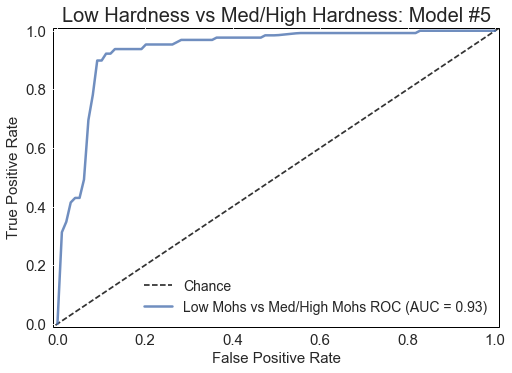

In [38]:
import numpy as np
from scipy import interp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

#Calculating the true positive and false positive rates
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=0.33)
clf=RandomForestClassifier(n_estimators=10000)
probas_=clf.fit(X_train, y_train).predict_proba(X_test)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

fig,ax=plt.subplots()
ax.plot([-0.05, 1.05], [-0.05, 1.05], 'k--',
         label='Chance', alpha=.8)
ax.plot(mean_fpr, mean_tpr,
         label=r'Low Mohs vs Med/High Mohs ROC (AUC = %0.2f)' % (mean_auc),
         lw=2.5, alpha=.8)

#Setting up axes limits and plot labels
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Low Hardness vs Med/High Hardness: Model #5', fontsize = 20)
plt.legend(loc="lower right", fontsize = 14)

#Aesthetics: Plot background color
ax.set_facecolor('white')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')  
ax.tick_params(axis='both', which='major', labelsize=15)


plt.show()

Model 5 was able to discriminate the vast majority of naturally occurring minerals with an AUC around 0.95 as shown in the ROC plot above. This suggests that compositional predictors developed for these materials can be generally applied with reasonable reliability to other single crystalline materials across a wide-ranging compositional and structural space.

## Feature Importance

There are 11 available features for each individual crystal composition. This study not only predicts Mohs hardness based on feature descriptors, but also identifies which of these descriptors are most important to making the predictions for several random forest models. 

To do this, the variable importance metric called Gini importance is employed to find the relative importances of a set of predictors based on the Gini index. The Gini index is commonly used as the splitting criterion in tree-based classifiers, as a function to measure the quality of a split. The reduction of the Gini index brought on by a feature is called the Gini importance or the mean decrease impurity. 

The Gini importance for a feature indicates that feature’s overall discriminative value during the classification. If the decrease is low, then the feature is not important. An irrelevant variable has an importance of zero. The sum of the importances across all features is equal to 1. 

In this portfolio project, Gini feature importance is used to gauge the relative importance of a set of compositional-based features on random forest classification of Mohs hardness values. With the top five Gini importances, we can surmise which five features might be important for prediction.

## Extracting Feature Importance

In [24]:
from sklearn.model_selection import KFold

cv=KFold(n_splits=3,shuffle=True)
imp=[]
y_array = np.array(y)
for train, test in cv.split(X,y):
    clf=RandomForestClassifier(n_estimators=10000)
    y_pred=clf.fit(X[train],y_array[train]).predict(X[test])
    predictions=pd.DataFrame(data={'y_test':y_array[test],'y_pred':y_pred})
    importances = clf.feature_importances_
    imp.append(importances)
imp_df=pd.DataFrame(np.transpose(imp))
imp_df["Mean"]=np.mean(imp_df, axis=1)
imp_df["Std"]=imp_df.iloc[:,0:3].std(axis=1)
imp_df["Features"]=df.columns[3:]
indices = np.argsort(list(imp_df["Mean"]))[::-1]

print("Feature ranking from most to least important:")
for f in range(X.shape[1]):
    print("%d. Feature %d, %s, (%f +/- %f)" % (f + 1, indices[f], imp_df["Features"][indices[f]], imp_df["Mean"][indices[f]], imp_df["Std"][indices[f]]))
    

Feature ranking from most to least important:
1. Feature 9, zaratio_Average, (0.111370 +/- 0.013024)
2. Feature 3, val_e_Average, (0.108713 +/- 0.016071)
3. Feature 5, ionenergy_Average, (0.108609 +/- 0.012011)
4. Feature 8, R_cov_element_Average, (0.106749 +/- 0.000865)
5. Feature 7, R_vdw_element_Average, (0.101538 +/- 0.009680)
6. Feature 10, density_Average, (0.098631 +/- 0.017185)
7. Feature 2, allelectrons_Average, (0.079399 +/- 0.015011)
8. Feature 4, atomicweight_Average, (0.078312 +/- 0.014124)
9. Feature 1, density_Total, (0.073299 +/- 0.006372)
10. Feature 6, el_neg_chi_Average, (0.067815 +/- 0.006766)
11. Feature 0, allelectrons_Total, (0.065564 +/- 0.002932)


Of the eleven possible features, the five most important features are Features 9, 8, 3, 5, and 7 with feature importances around 0.11. These features correspond to the atomic average atomic number to mass number ratio, atomic average of ionization energy, the atomic average of the covalent atomic radii, the atomic average of the valence electrons, and the atomic average of the van der Waals atomic radii, respectively. The related factors from these studies directly correspond to material characteristics previously attributed as contributors to material hardness. The number of valence electrons per bond was included as a factor in Gao et al$^{20}$, Šimůnek et al$^{21}$, and Mukhanov et al$^{25}$. Atomic radii (both covalent and van der Waals) are related to the bond length factor in Gao et al23 and the molar volume in Mukhanov et al$^{25}$. The first ionization energy is related to the bond strength of the material$^{28, 29}$, which Šimůnek and Vackář attribute as a major factor in hardness. 

## Model Performance on Naturally Occuring Minerals Dataset

To determine the performance of the models utilized, all models were constructed with the naturally occurring mineral dataset, which was split 500 times into three-fold training and test subsets in the manuscript. 

However in this portfolio project, the three-fold training and test subset modeling is only performed **once**.

<img src="images/Workflows_1.jpg">




### Model Training and Prediction

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, precision_recall_fscore_support

X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=0.33)
clf=RandomForestClassifier(n_estimators=10000)
y_pred=clf.fit(X_train,y_train).predict(X_test)

### Classification Report 

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.87      0.87        78
          1       0.92      0.92      0.92       128

avg / total       0.90      0.90      0.90       206



### Confusion Matrix

And visualize the confusion matrix for the results.

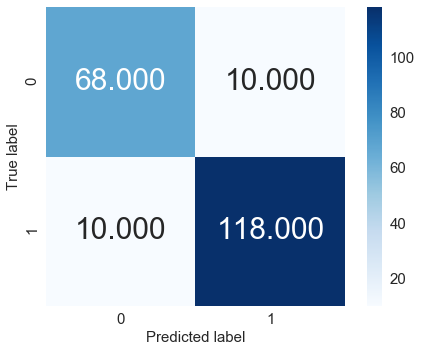

In [59]:
from sklearn.metrics import confusion_matrix
#print((confusion_matrix(y_test,y_pred)))

cm = confusion_matrix(y_test, y_pred)
cm2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

# View with a heatmap as raw data
plt.figure()
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label', fontsize = 15)
plt.xlabel('Predicted label', fontsize = 15)


plt.show()

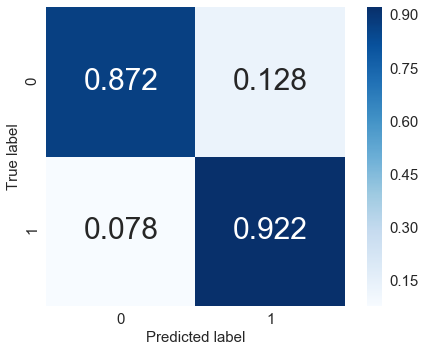

In [60]:
#View confusion matrix as a percentage of sample sizes
plt.figure()
sns.set(font_scale=1.5)

sns.heatmap(cm2, annot=True, annot_kws={"size":30}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label', fontsize = 15)
plt.xlabel('Predicted label', fontsize = 15)

plt.show()

## Considerations

This is a reasonable first screening step that allows us to efficiently gauge important factors that may contribute to material hardness. However, to make larger generalizations about the nature of hardness, there are more considerations I would include for future studies.

I've split them into two sections: machine learning and materials science.

### Machine Learning

- More elemental features:
    - Heat capacity
    - Vapor pressure
    - Magnetic susceptibility

- More models:
    -	Radial basis and Matern SVMs were used in the manuscript but were not in this portfolio project. Grid optimization of soft margin cost function (C) and regularization factors (gamma), and smoothness of Matern kernel to the data (nu) were also included.
    -	Neural networks

- More feature selection methods
    -	PCA,
    -	Univariate selection, and 
    -	Recursive feature elimination

- Different type of importance calculations: Permutation importance, etc.

- Reduction of data bias in artificial dataset included in the manuscript but not the portfolio project
    -	More artificial materials, particularly more in the superhard range (M > 9) to reduce data bias currently seen in the artificial materials dataset

### Materials Science

- Modified dataset: compilation of a dataset using experimental Vickers hardness values for minerals collected at the same loadings.

- More material types because different factors contribute to material plasticity
    -	Polycrystalline materials
        -	Dislocations, defect hardening, etc.
    -	Metals
        - Dislocation entanglements$^{30}$.
        - Due to the delocalized nature of the bonding in metals, plastic deformations locally accumulate before fracture, resulting in ductility and reduced hardness, generating a connection between bulk modulus, shear modulus, hardness, and ductility. This connection has previously been referenced by Chen$^{31}$, Tabor$^{32}$, and Pugh$^{33}$ among others. 
    -	Plastics
        - Chain length
        - Degree of cross-linking
        - Degree of polymeric short-order “crystallinity”



## Conclusions

This study shows that comparative material properties like Mohs hardness can be modeled with machine learning algorithms using features based solely on material composition. The results show that random forests and support vector machines are able to produce reasonable predictions of materials property. 

They also show that different features are relatively important for predicting Mohs hardness values. These features include the atomic average of the van der Waals atomic radii, the atomic average of the covalent atomic radii, the atomic average of the valence electrons, and the atomic average of ionization energy among others. These features were previously included in separate studies$^{20, 21, 25}$ but were combined into this one study to greater understand their interrelated physical contributions to materials hardness. 

In conclusion, I have demonstrated that a machine learning model can be useful in classifying comparative material properties like Mohs hardness. The methodology described here could be applied to other types of materials for accelerated design and materials science discovery of novel materials.

## References


1. Plinninger, R. J.; Spaun, G.; Thuro, K. Prediction and Classification of Tool Wear in Drill and Blast Tunnelling. In *Proceedings of 9th Congress of the International Association for Engineering Geology and the Environment*; **2002**; pp 16–20.
2. Hoseinie, S. H.; Ataei, M.; Mikaiel, R. Comparison of Some Rock Hardness Scales Applied in Drillability Studies. *Arab. J. Sci. Eng.**2012**, 37, 1451–1458.
3. Thuro, K.; Plinninger, R. J. Hard Rock Tunnel Boring, Cutting, Drilling and Blasting: Rock Parameters for Excavatability. In *10th ISRM Congress; International Society for Rock Mechanics*, **2003**.
4. Ellecosta, P.; Schneider, S.; Kasling, H.; Thuro, K. Hardness–A New Method for Characterising the Interaction of TBM Disc Cutters and Rocks In *13th ISRM International Congress of Rock Mechanics*; International Society for Rock Mechanics and Rock Engineering, **2015**.
5. Moore, M. A. The Relationship between the Abrasive Wear Resistance, Hardness and Microstructure of Ferritic Materials. *Wear* **1974**, 28, 59–68.
6. Axén, N.; Jacobson, S.; Hogmark, S. Influence of Hardness of the Counterbody in Three-Body Abrasive Wear — an Overlooked Hardness Effect. *Tribol. Int.* **1994**, 27, 233–241.
7. Jefferies, S. R. Abrasive Finishing and Polishing in Restorative Dentistry: A State-of-the-Art Review. *Dent. Clin. North Am.* **2007**, 51, 379–397.
8. Balaceanu, M.; Petreus, T.; Braic, V.; Zoita, C. N.; Vladescu, A.; Cotrutz, C. E.; Braic, M. Characterization of Zr-Based Hard Coatings for Medical Implant Applications. *Surf. Coatings Technol.* **2010**, 204, 2046–2050.
9. Parsons, J. R.; Lee, C. K.; Langrana, N. A.; Clemow, A. J.; Chen, E. H. Functional and Biocompatible Intervertebral Disc Spacer Containing Elastomeric Material of Varying Hardness. Google Patents December 15, **1992**.
10. Okazaki, Y.; Ito, Y.; Ito, A.; Tateishi, T. Effect of Alloying Elements on Mechanical Properties of Titanium Alloys for Medical Implants. *Mater. Trans. JIM* **1993**, 34, 1217–1222.
11. Kanyanta, V. Hard, Superhard and Ultrahard Materials: An Overview. In *Microstructure-Property Correlations for Hard, Superhard, and Ultrahard Materials*; Springer International Publishing: Cham, **2016**; pp 1–23.
12. Hwang, D. K.; Moon, J. H.; Shul, Y. G.; Jung, K. T.; Kim, D. H.; Lee, D. W. Scratch Resistant and Transparent UV-Protective Coating on Polycarbonate. J. *Sol-Gel Sci. Technol.* **2003**, 26, 783–787.
13. Luber, J. R.; Bunick, F. J. Protective Coating for Tablet. Google Patents August 21, **2001**.
14. Li, K.; Yang, P.; Niu, L.; Xue, D. Group Electronegativity for Prediction of Materials Hardness. *J. Phys. Chem. A* **2012**, 116, 6911–6916.
15. Broz, M. E.; Cook, R. F.; Whitney, D. L. Microhardness, Toughness, and Modulus of Mohs Scale Minerals. *Am. Mineral.* **2006**, 91, 135–142.
16. Gilman, J. J. *Chemistry and Physics of Mechanical Hardness*; John Wiley & Sons, **2009**; Vol. 5.
17. Oganov, A. R.; Lyakhov, A. O. Towards the Theory of Hardness of Materials. Orig. Russ. Text © A.R. Oganov, A.O. Lyakhov **2010**, 32, 3–8.
18. Li, K.; Yang, P.; Niu, L.; Xue, D. Hardness of Inorganic Functional Materials. *Rev. Adv. Sci. Eng.* **2012**, 1, 265–279.
19. Cohen, M. L. Predicting Useful Materials. *Science* (80-. ). **1993**, 261, 307–309.
20. Gao, F.; He, J.; Wu, E.; Liu, S.; Yu, D.; Li, D.; Zhang, S.; Tian, Y. Hardness of Covalent Crystals. *Phys. Rev. Lett.* **2003**, 91, 015502.
21. Šimůnek, A.; Vackář, J. Hardness of Covalent and Ionic Crystals: First-Principle Calculations. *Phys. Rev. Lett.* **2006**, 96, 085501.
22. CRC. *CRC Handbook of Chemistry and Physics*, 98th Editi.; Rumble, J. R., Ed.; CRC Press/Taylor & Francis: Boca Raton, FL., **2018**.
23. Downs, R.T., Hall-Wallace, M. The American Mineralogist Crystal Structure Database. *Am. Mineral*. **2003**, 88, 247–250.
24. Example of 100 vs 110
25. Mukhanov, V. A.; Kurakevych, O. O.; Solozhenko, V. L. Thermodynamic Aspects of Materials’ Hardness: Prediction of Novel Superhard High-Pressure Phases. *High Press. Res.* **2008**, 28, 531–537.
26. Li, K.; Xue, D. Estimation of Electronegativity Values of Elements in Different Valence States. *J. Phys. Chem. A* **2006**, 110, 11332–11337.
27. Li, K.; Wang, X.; Zhang, F.; Xue, D. Electronegativity Identification of Novel Superhard Materials. *Phys. Rev. Lett.* **2008**, 100, 235504.
28. Dimitrov, V.; Komatsu, T. Correlation among Electronegativity, Cation Polarizability, Optical Basicity and Single Bond Strength of Simple Oxides. *J. Solid State Chem.* **2012**, 196, 574–578.
29. Plenge†, J.; Kühl, S.; B. Vogel; R. Müller; F. Stroh,  and; Hobe, M. von; and, R. F.; Rühl*, E. Bond Strength of Chlorine Peroxide. **2005**.
30. Tabor, D. The Hardness of Solids. *Rev. Phys. Technol.* **1970**, 1, 145–179.
31. Chen, X.-Q.; Niu, H.; Li, D.; Li, Y. Modeling Hardness of Polycrystalline Materials and Bulk Metallic Glasses. *Intermetallics* **2011**, 19, 1275–1281.
32. Tabor, D. *The Hardness of Metals*; Oxford university press, **2000**.
33. Pugh, S. F. XCII. Relations between the Elastic Moduli and the Plastic Properties of Polycrystalline Pure Metals. *London, Edinburgh, Dublin Philos. Mag. J. Sci.* **1954**, 45, 823–843.
